## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [1]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [2]:
X, y = dataset['data'], dataset['target']

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import random

In [5]:
RM = X[:, 5]

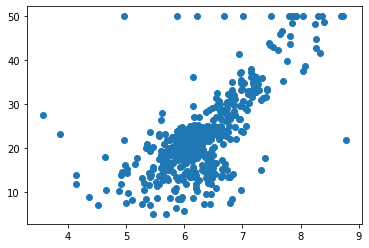

In [15]:
plt.scatter(X[:, 5], y)
# plt.scatter(RM, price)

In [8]:
def price(rm, k, b):  # 预测价格
    """f(x) = k * x + b"""
    return k * rm + b

#### Loss 函数采用$loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [9]:
def loss_1(y, y_hat):
    return sum(abs(yi-yhi) for yi, yhi in zip(list(y), list(y_hat)))/len(list(y))

In [10]:

# 得到 k 的梯度更新
def k_gradient(x, y, y_hat):  
    n = len(y)
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -=  x_i
        else: 
            gradient +=  x_i
    
    return gradient / n

# 得到 b 的梯度更新
def b_gradient(x, y, y_hat): 
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i > y_hat_i:
            gradient -= 1
        else: 
            gradient +=  1
    return gradient / n

In [45]:
# price(RM, 1, 0)
random.random()

0.9573995093449856

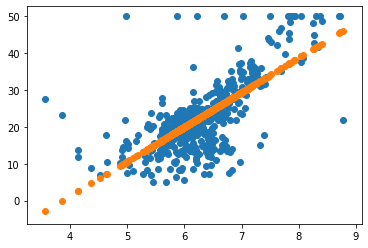

In [67]:
N =10000
# k = random.random() * 200 - 100
# b = random.random() * 200 - 100
k, b = 0, 0
learning_rate = 0.2
min_loss = float('inf')
# input RM , y
for i in range(N):
    pre = price(RM, k, b)
    loss_current = loss_1(y, pre)
    if loss_current < min_loss:
        min_loss = loss_current
        best_k, best_b = k, b
#         print('k: ',k,'b: ',b,'loss: ', min_loss)
#         plt.scatter(RM, y)
#         plt.scatter(RM, price(RM, best_k, best_b))
    k = k - k_gradient(RM, y, pre)*learning_rate
    b = b - b_gradient(RM, y, pre)*learning_rate
plt.scatter(RM, y)
plt.scatter(RM, price(RM, best_k, best_b))

#### Loss 函数采用 $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$

In [73]:
def loss_2(y, y_hat):
    return sum((yi-yhi)**2 for yi, yhi in zip(list(y), list(y_hat)))/len(list(y))

k:  10.063504206515157 b:  -40.786169258736216 loss:  44.06134729588047


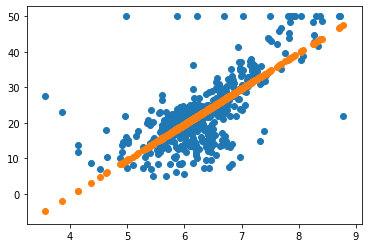

In [79]:
N =10000
k = random.random() * 100 - 100
b = random.random() * 100 - 100
# k, b = 0, 0
learning_rate = 1e-05
min_loss = float('inf')
# input RM , y
for i in range(N):
    pre = price(RM, k, b)
    loss = loss_2(y, pre)

    if loss < min_loss:
        min_loss = loss
        best_k, best_b = k, b
        # print('k: ', best_k, 'b: ', best_b, 'loss: ', min_loss)
    k = k + sum([(i - j) * x for i, j, x in zip(list(y), list(pre), list(RM))])*learning_rate
    b = b + sum([(i - j) for i, j in zip(y, pre)])*learning_rate
print('k: ', best_k, 'b: ', best_b, 'loss: ', min_loss)
plt.scatter(RM, y)
plt.scatter(RM, price(RM, best_k, best_b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [81]:
import functools

In [82]:
solution = {}  # 记录插入删除替换的过程
@functools.lru_cache(maxsize=2**10)  # 用来做缓存，他能把相对耗时的函数结果进行保存，避免传入相同的参数重复计算
def edit_distance(string1, string2):  # 递归函数,返回的int表示距离
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [  # 记录一步操作是删除还是插入
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:  # 最后一个字符相同
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')  # 直接去掉最后一个字符,距离不增加
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))  # 最后一个字符替换成相同的
    
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [ ]:
edit_distance('ABCDE', 'ABCCEF')
solution
solution.keys()

In [ ]:
parse={}

def parse_solution():
    keys = list(solution.keys())
    i = -1
    while i>= -len(solution):
        #print(1)
        if 'SUB' in solution[keys[i]].split(' ') or not solution[keys[i]]:
            
            parse[keys[i]]=solution[keys[i]]
            (string1,string2)=(keys[i][0][:-1], keys[i][1][:-1])
            if not string1 or not string2:
                break
            index = keys.index((string1,string2))  
            i=index-len(solution)
        else:
            parse[keys[i]]=solution[keys[i]]
            i=i-1

In [ ]:
parse_solution()
parse_solution()

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function?¶

Ans: Because through the derivative or Gradient,we can find the fastest decrease direction of the function.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:
Gradient 是导数的多元推广，梯度的方向是函数在某点处最大的增长方向，梯度的大小是该方向的增长率。
Descent  是下降，也就是取梯度的相反方向


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 使用梯度可以保证每次前进的方向都是函数在该点下降最快的方向。

4. Using the simple words to describe: What's the machine leanring.¶

Ans: ML focuses on computer programs that access data and use it learn for themselves.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

ans:
- 1."Those who cannot remember the past are condemned to repeat it." 动态规划可以把复杂问题分解成小问题来递归求解，从而可以减少重复运算找到最优解。
- 2.动态规划和搜索问题最大的不同就是：DP中问题的最优解可以由子问题的最优解来构造；而搜索问题没有这样的递归结构，只专注于在结果空间尽快找到解。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

动态规划算法更加的直接有效，很难使用机器学习的方法拟合问题。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

- 斐波那契数列
- rob cutting problem
- edit-distance problem
- travel salesman problem

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

- 拼写纠错
- 语句对比
- 文章修改

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

- 状态参数
- 递推公式
- 终止条件

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

- 没有标准模板可供也应用，也没有构造模型的方法，甚至还没有准则可以判断是否可以使用动态规划。
- 数值计算中存在维度灾难

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

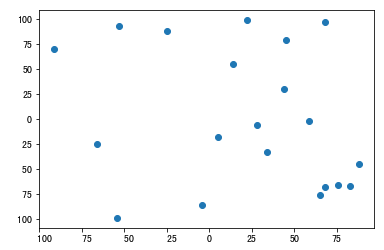

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

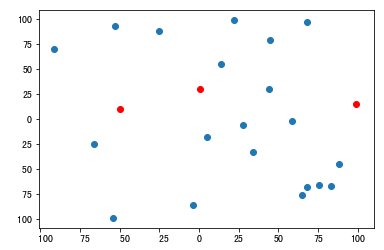

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


shuro